In [1]:
# !chmod 400 /Users/jackhan/Desktop/Alpfin/OneZero_Data.pem
# !ssh-add -d ~/.ssh/id_ed25519

In [2]:
import requests

# Fetch public IP
response = requests.get("http://checkip.amazonaws.com")
if response.status_code == 200:
    public_ip = response.text.strip()
    print(f"Public IP: {public_ip}")
else:
    print(f"Failed to fetch public IP. Status code: {response.status_code}")

# The public IP should be in the whitelist of the AWS server, contact Sabah Hussain for access 

Public IP: 18.133.184.11


In [3]:
from PointSpread import get_quote_data, PointSpreadDisplay
import pandas as pd

In [4]:
from_date = pd.to_datetime('2025-01-08')
to_date = pd.to_datetime('2025-01-09')
symbol = "XAU/USD"
df = get_quote_data(from_date, to_date, symbol)

Transformed symbol: XAUUSD
Date range: ['2025-01-08', '2025-01-09']
Local file missing: Data/XAUUSD_2025-01-08.pkl
Local data not fully available. Proceeding to fetch data from the database.
Identified partitions: ['p_jan_2025']
Time filter: 2025-01-08 00:00:00 to 2025-01-09 00:00:00
Establishing DB Connection directly
Executing queries for XAU/USD from 2025-01-08 00:00:00 to 2025-01-09 00:00:00...
Executing query:

                SELECT 
                    MakerId, 
                    CoreSymbol, 
                    TimeRecorded, 
                    Depth, 
                    Side, 
                    Price, 
                    Size
                FROM Alp_Quotes PARTITION (p_jan_2025)
                FORCE INDEX (idx_time_recorded)
                WHERE 
                    CoreSymbol = 'XAU/USD'
                    AND TimeRecorded >= '2025-01-08 00:00:00'
                    AND TimeRecorded < '2025-01-09 00:00:00';
            


Fetched 15546432 rows from partition.
DataFrame was sampled to 1000000 rows to reduce memory usage.
All data fetched. Total rows after sampling: 1000000
Direct database connection closed.


{'main_time_plot': '',
 'distribution_plots': {'hist_normal': '',
  'hist_log': '',
  'outlier': ''},
 'hourly_plots': {'2025-01-08': {'0': '',
   '1': '',
   '2': '',
   '3': '',
   '4': '',
   '5': '',
   '6': '',
   '7': '',
   '8': '',
   '9': '',
   '10': '',
   '11': '',
   '12': '',
   '13': '',
   '14': '',
   '15': '',
   '16': '',
   '17': '',
   '18': '',
   '19': '',
   '20': '',
   '21': '',
   '23': ''}},
 'statistics': {'describe_default': {'count': 168948.0,
   'mean': 0.14196075104245295,
   'std': 0.0782813676879061,
   'min': -4.547473508864641e-13,
   '25%': 0.09000000000014552,
   '50%': 0.14000000000032742,
   '75%': 0.19000000000005457,
   'max': 1.4899999999997817},
  'describe_custom': {'count': 168948.0,
   'mean': 0.14196075104245295,
   'std': 0.0782813676879061,
   'min': -4.547473508864641e-13,
   '5%': 0.009999999999763531,
   '25%': 0.09000000000014552,
   '50%': 0.14000000000032742,
   '75%': 0.19000000000005457,
   '95%': 0.2699999999999818,
   'max': 
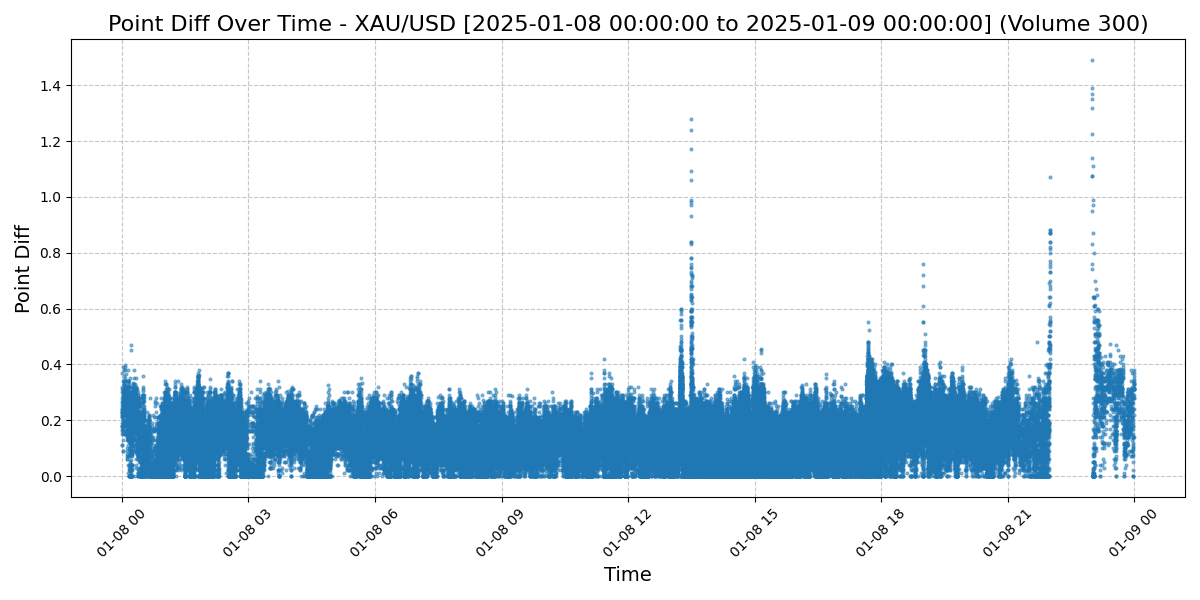
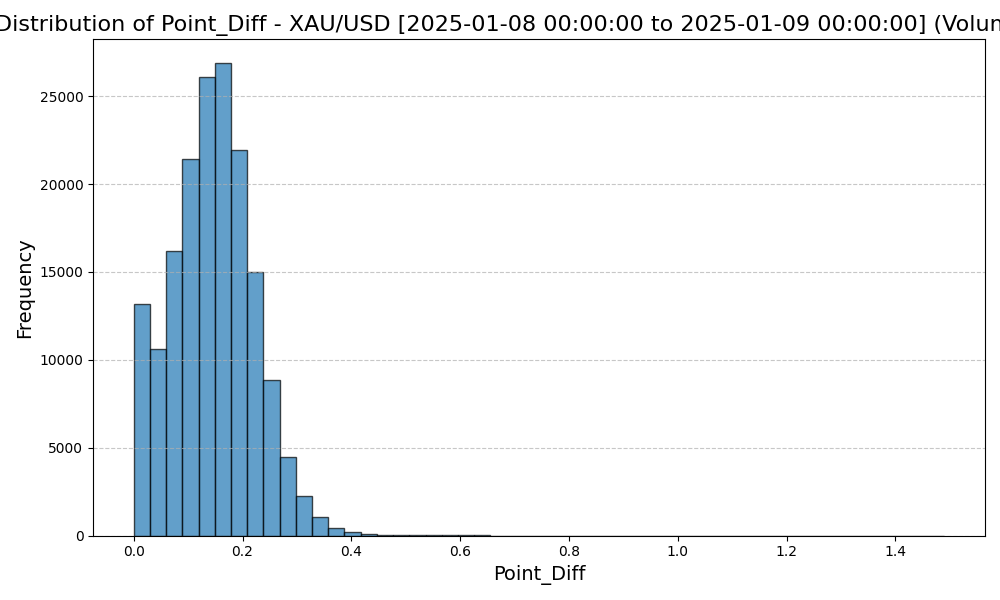
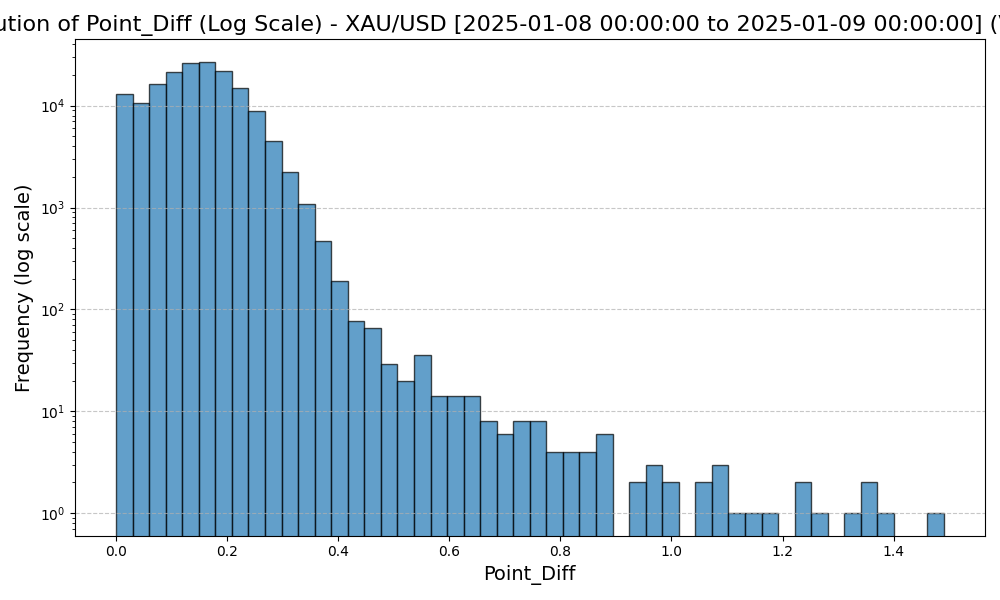
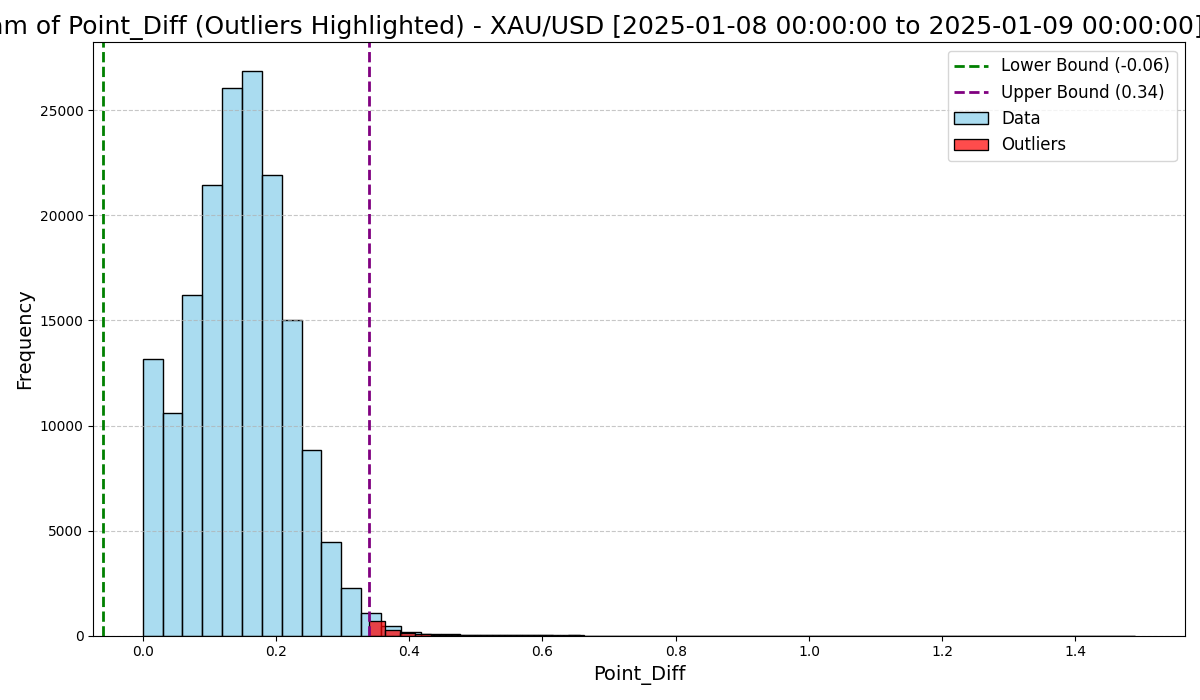
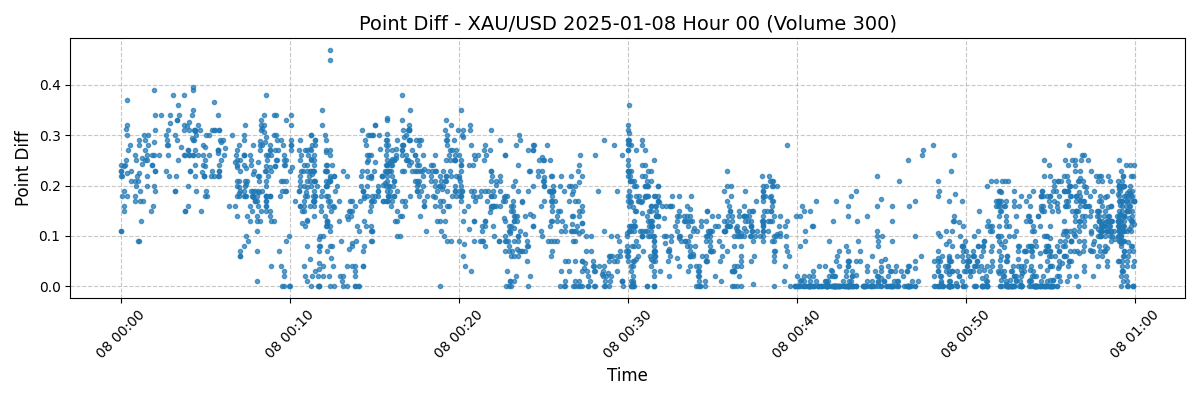
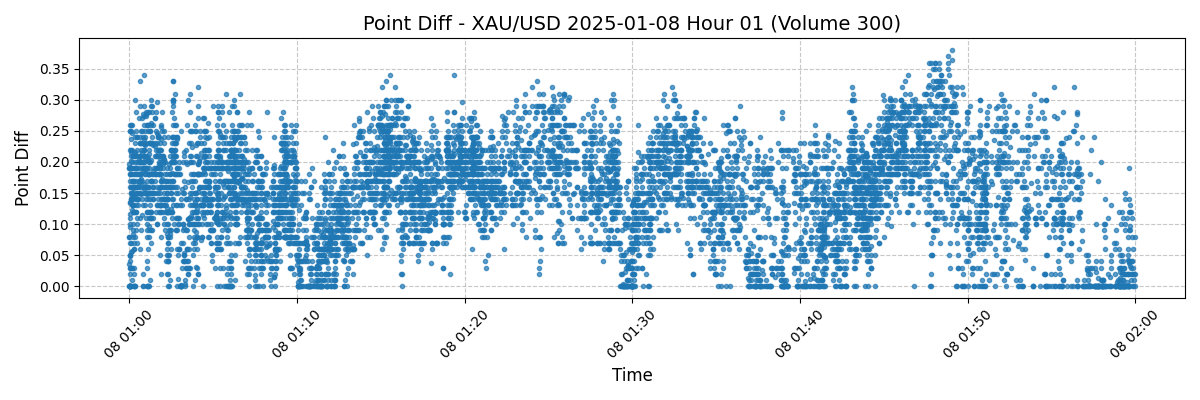
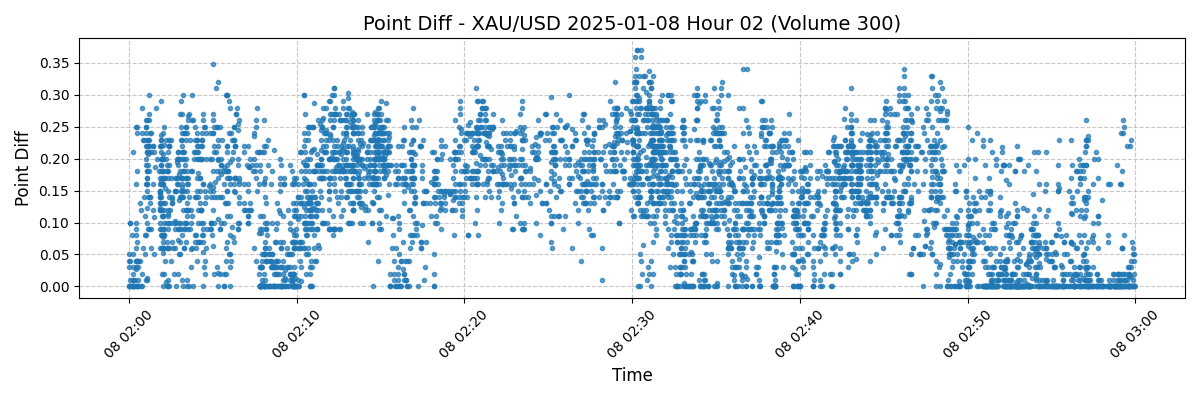
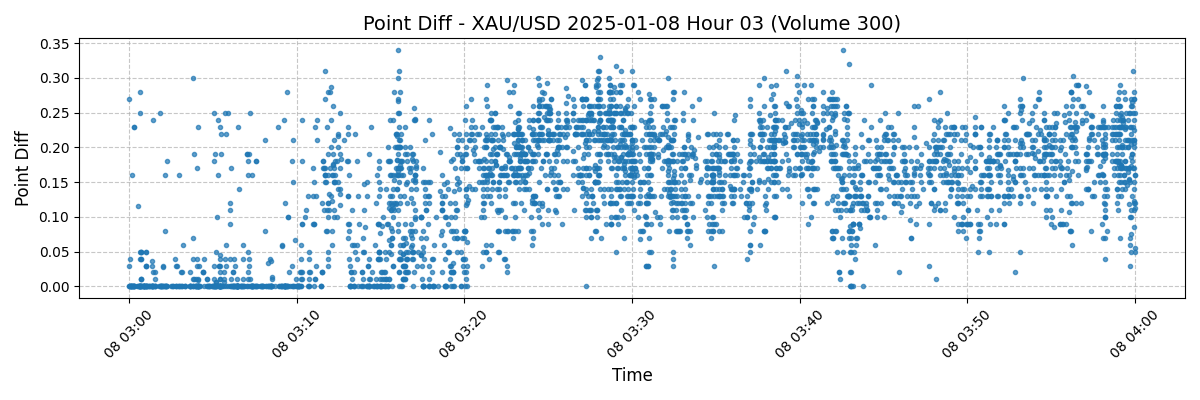
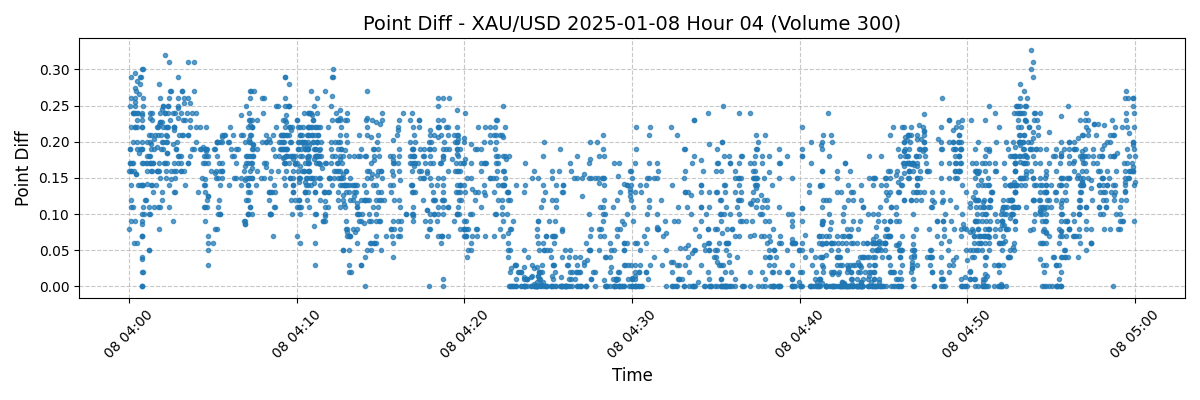
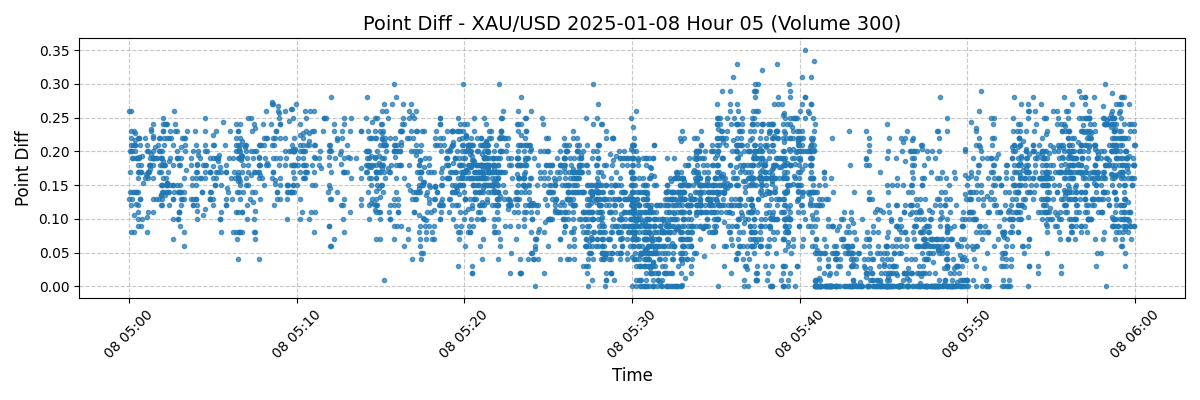
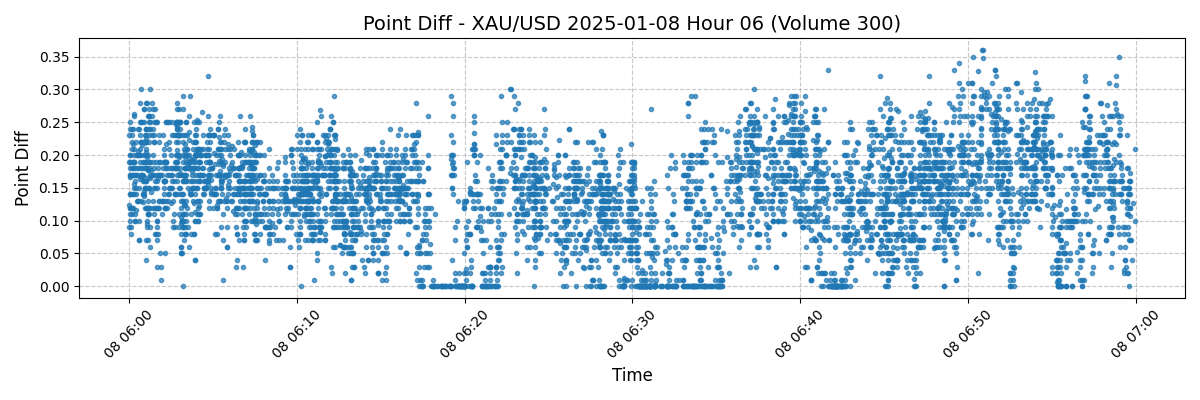
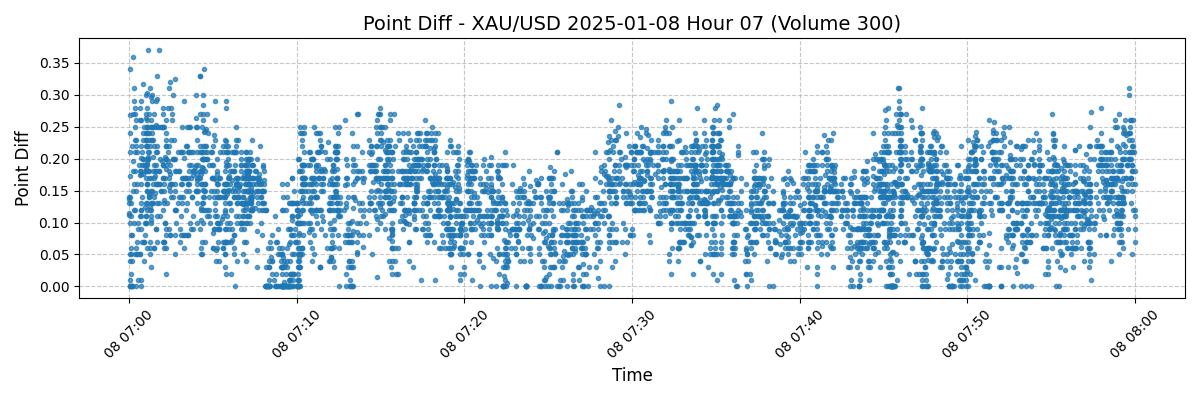
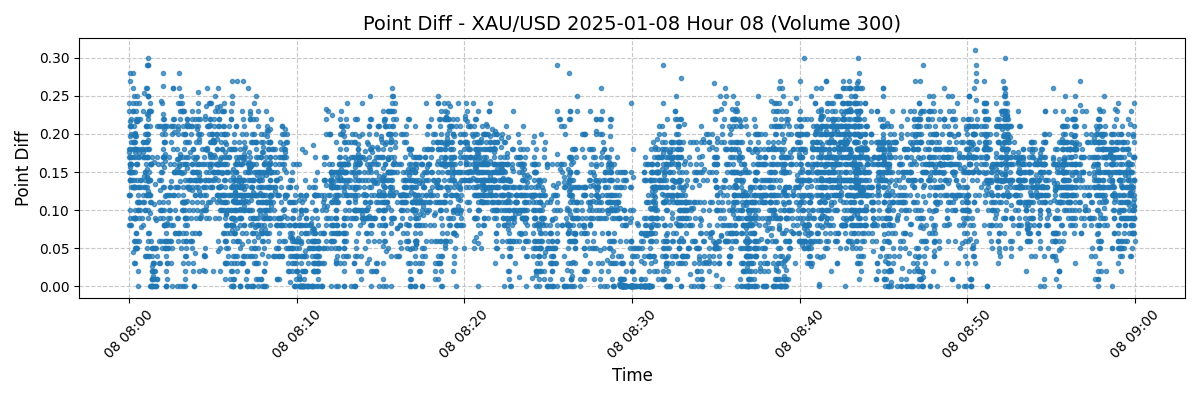
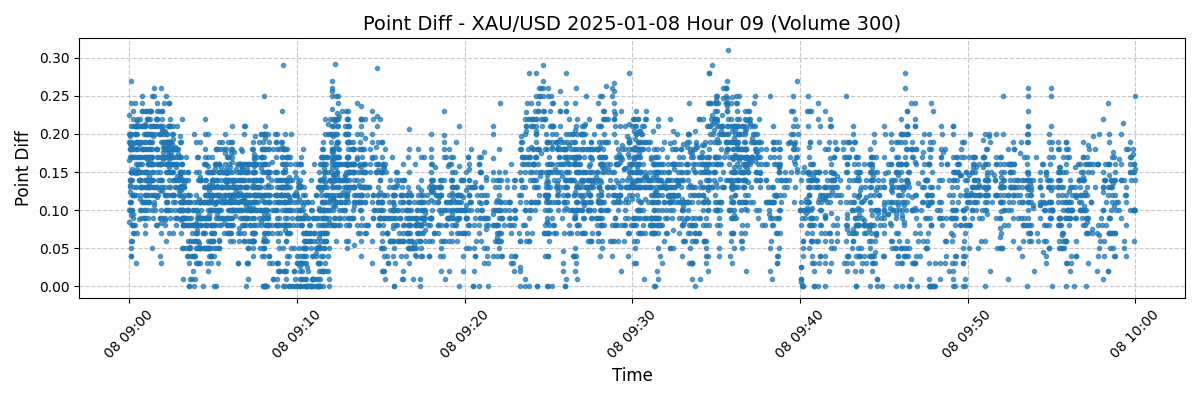
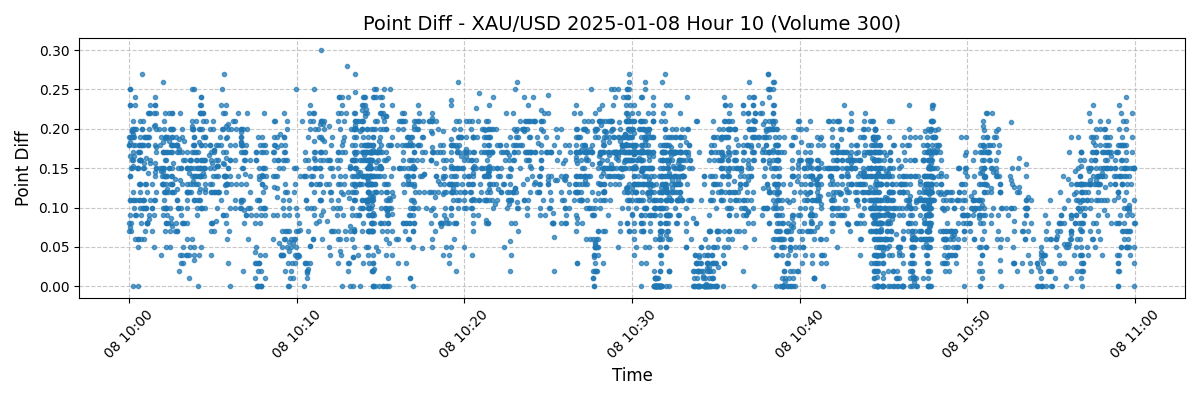
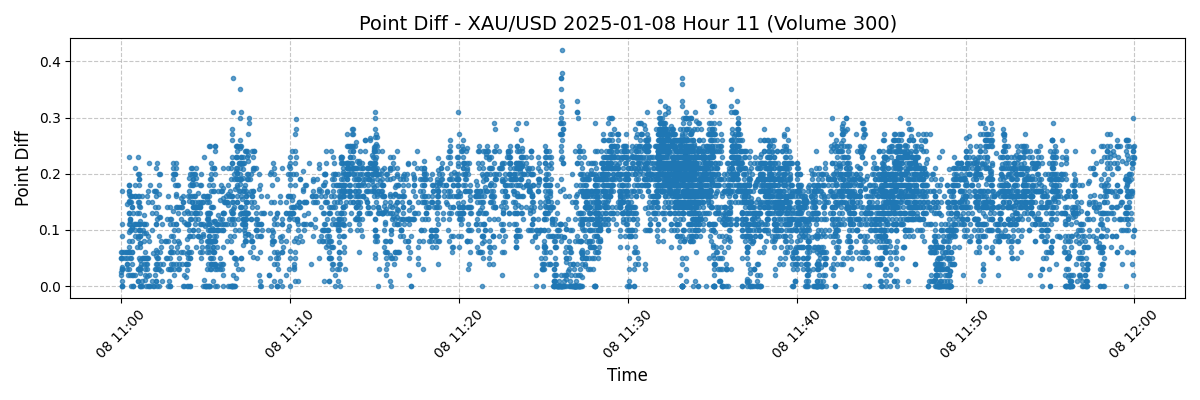
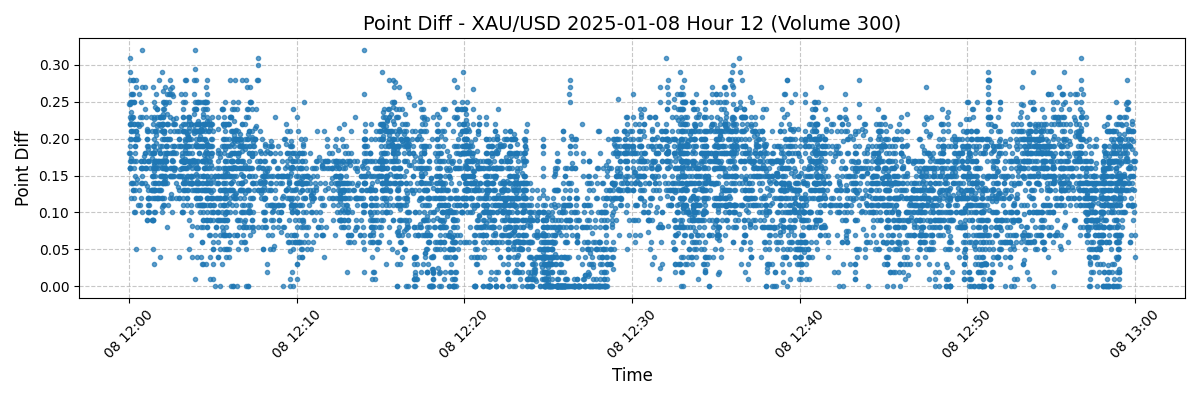
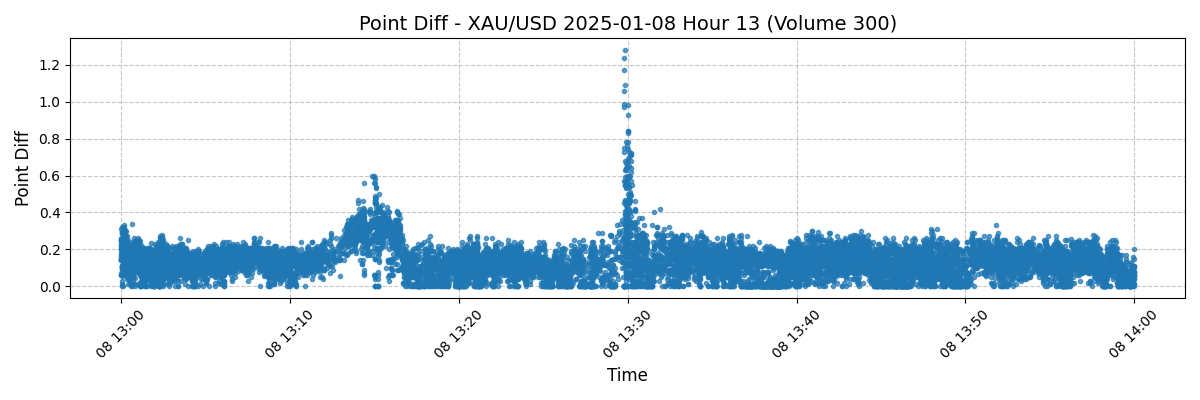
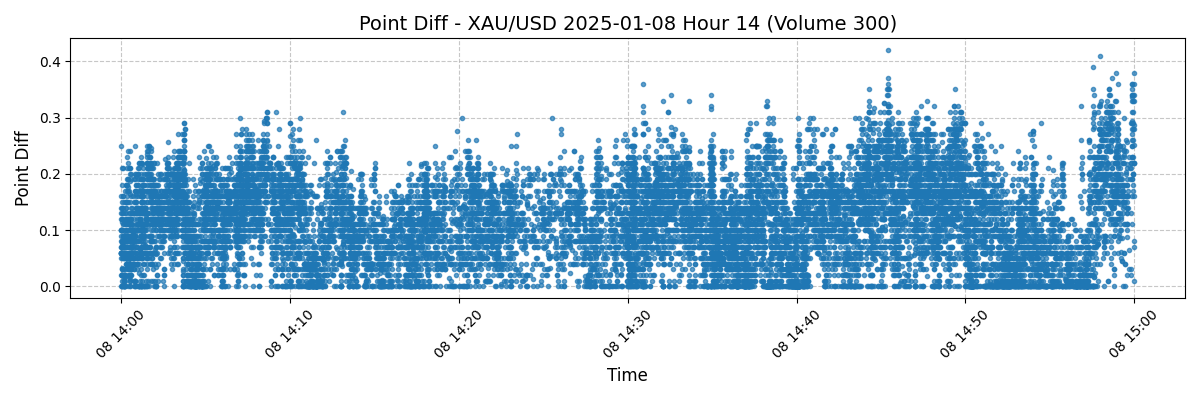
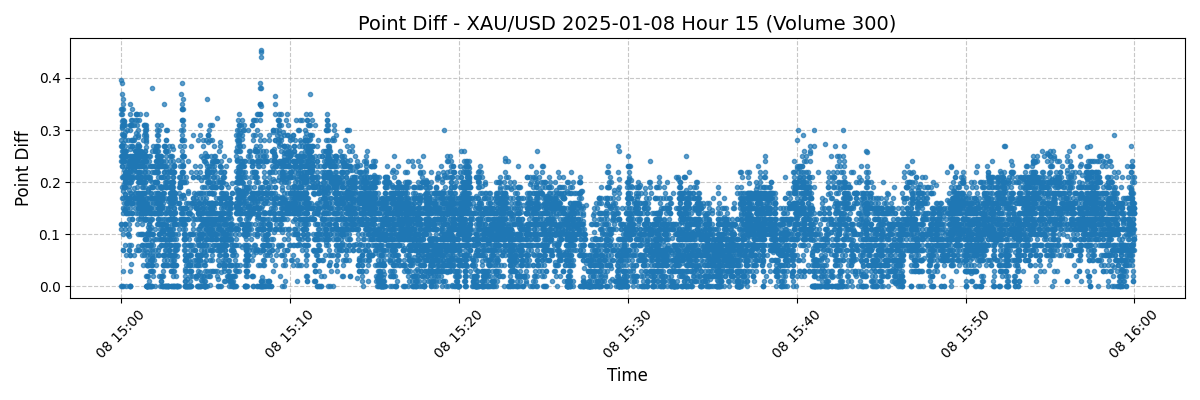
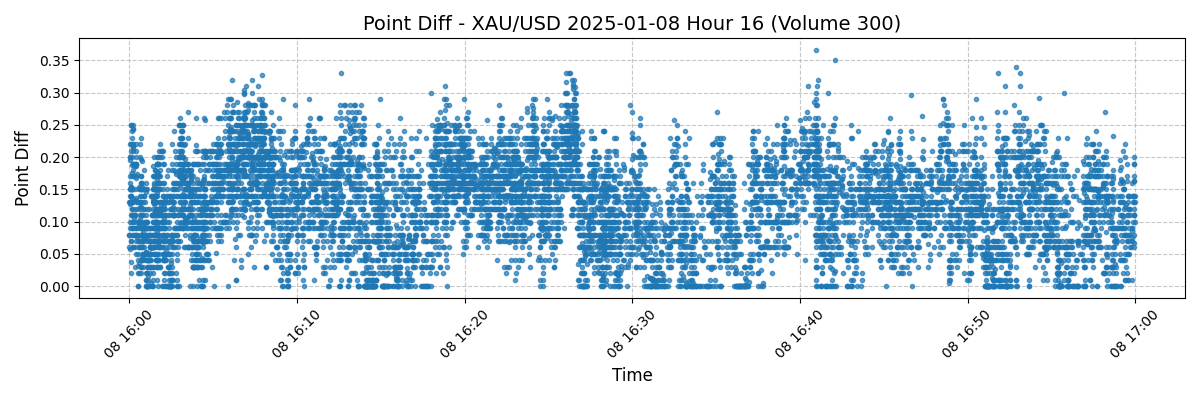
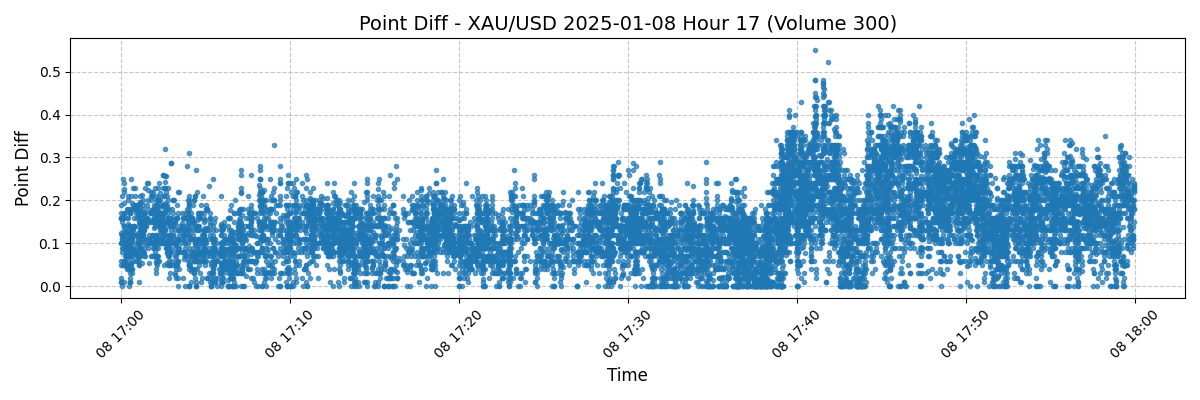
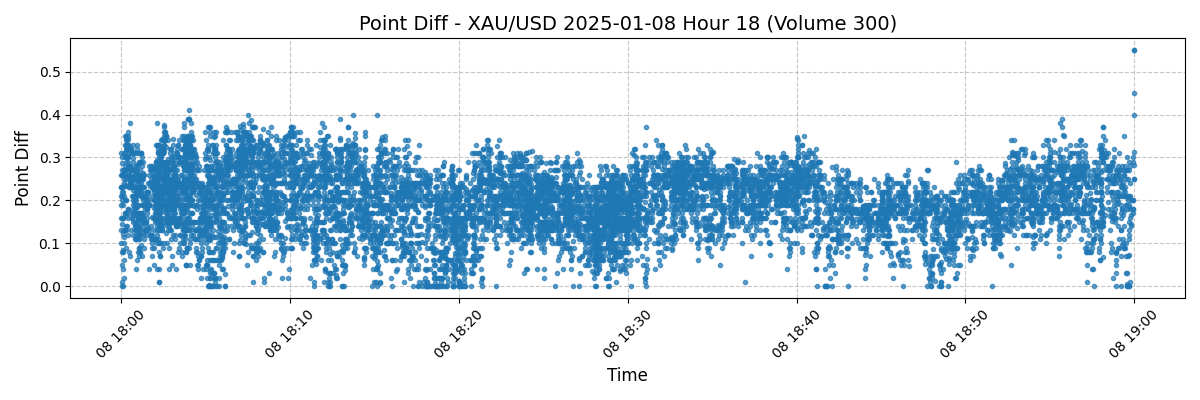
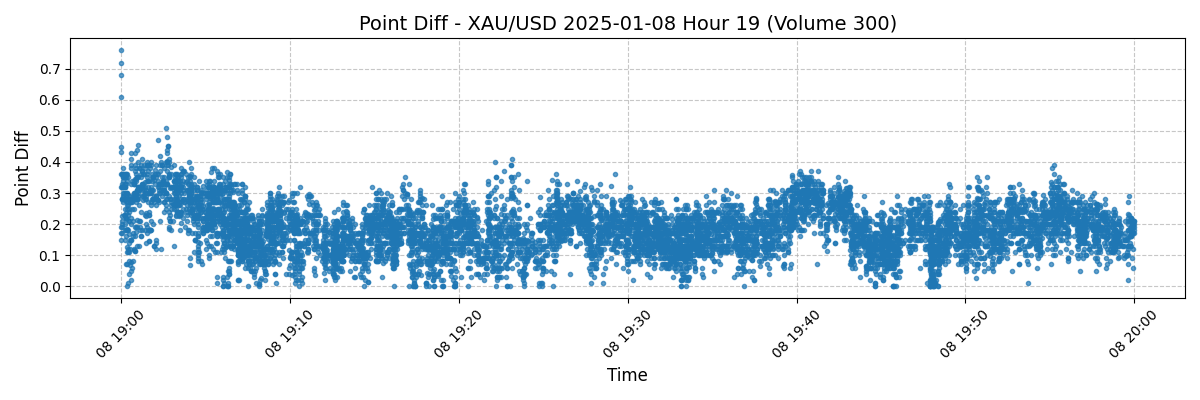
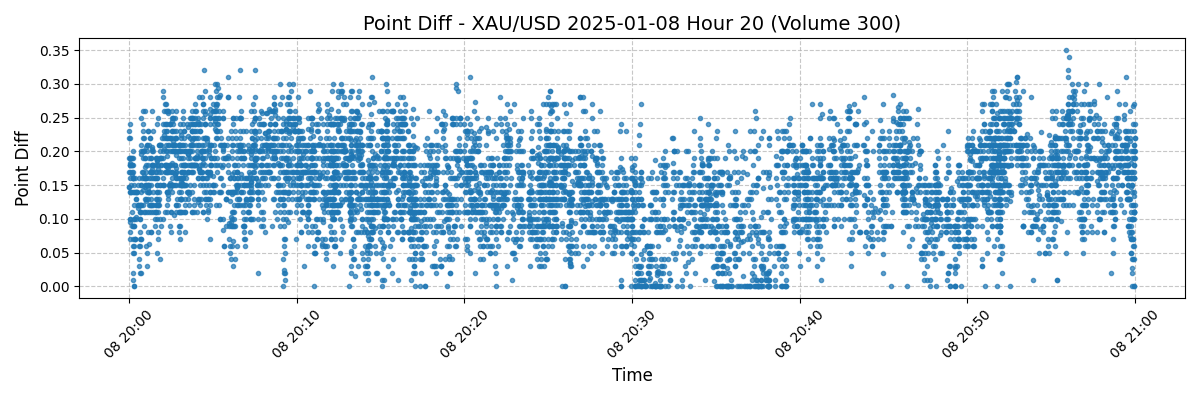
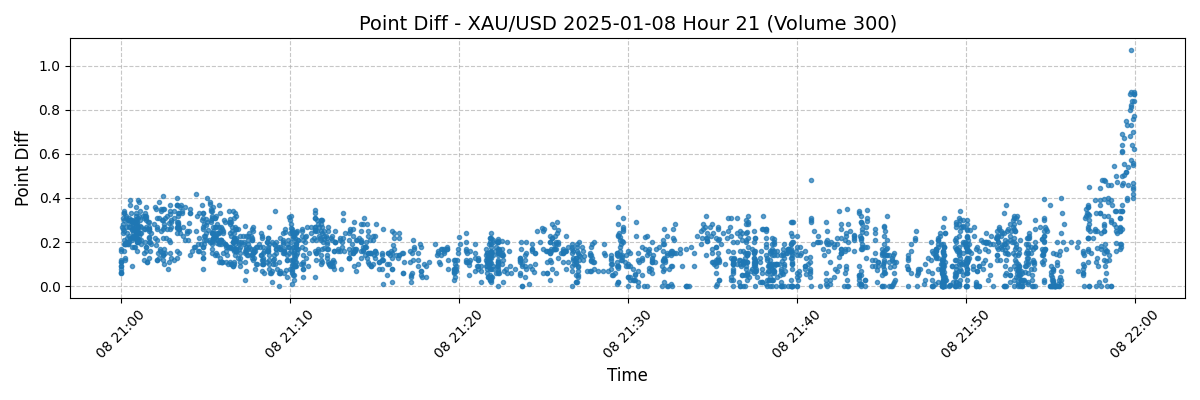
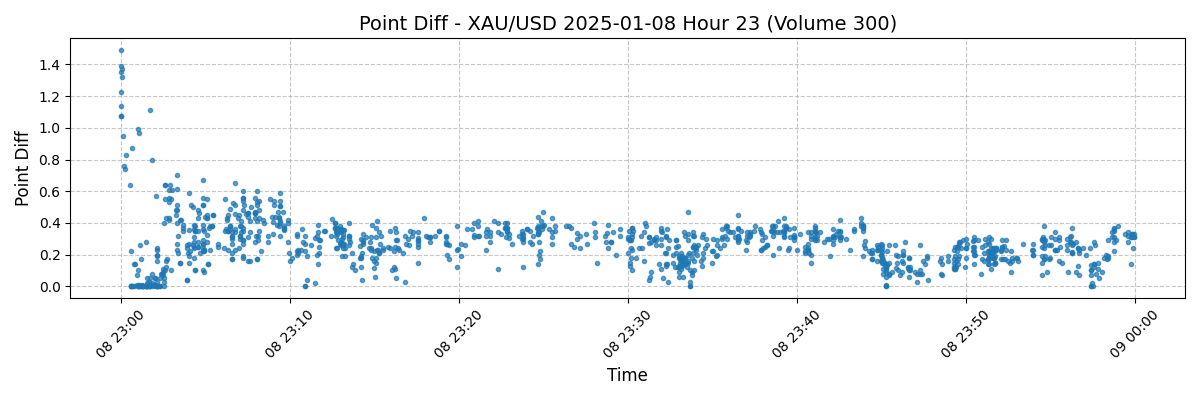

In [5]:
PointSpreadDisplay(df, 300, (from_date, to_date), maker_id="Britannia", top_of_book=False, symbol="XAU/USD")